# 春の可視化祭り

## 本日のデータセットの紹介
**Brewer's Friend Beer Recipes**<Br>
    https://www.kaggle.com/jtrofe/beer-recipes

176以上の異なるスタイルを持つ75,000以上のクラフトビールのレシピ<br>
- 様々なユーザーによって入力されたデータで、不十分な項目もあるが<br>
 Original Gravity(OG), Final Gravity(FG), ABV, IBU, Colorは、きちんと入力されている<br>
- Priming MethodとPriming Amount以外の値はすべて標準化されている<br>



In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 生データ可視化

In [7]:
beer_recipe = pd.read_csv('./data/recipeData.csv', index_col=0)
beer_recipe.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


### データサイズの確認

In [8]:
print("データの行数・列数: ",beer_recipe.shape)

データの行数・列数:  (73861, 22)


### 基本統計量の確認

In [9]:
summary = beer_recipe.describe()
summary

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


### データ型の確認

In [10]:
beer_recipe.dtypes

Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

### 欠損値の確認

In [11]:
beer_recipe.isnull().sum()

Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

更にこれをグラフ化すると、欠損箇所が把握しやすい

<BarContainer object of 15 artists>

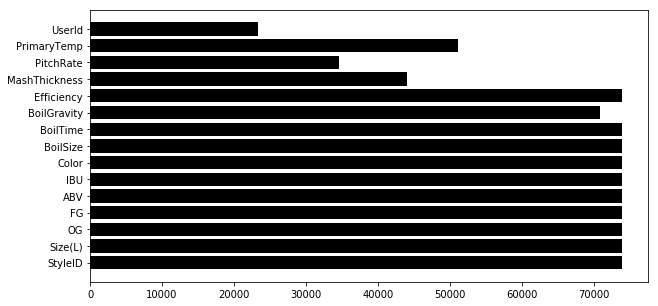

In [12]:
data = beer_recipe.describe()
count = data.iloc[0]

x = count.index
y = count.values
plt.figure(figsize=(10,5))
plt.barh(x, y, color ='black')

### 目的変数の確認


In [13]:
obj = beer_recipe['Style'].value_counts()
obj.columns = ['count']
obj

American IPA                         11940
American Pale Ale                     7581
Saison                                2617
American Light Lager                  2277
American Amber Ale                    2038
Blonde Ale                            1753
Imperial IPA                          1478
American Stout                        1268
Irish Red Ale                         1204
American Brown Ale                    1152
Witbier                               1072
California Common Beer                1044
Weissbier                              988
Oatmeal Stout                          961
Russian Imperial Stout                 929
Sweet Stout                            919
Weizen/Weissbier                       919
Robust Porter                          897
Kˆlsch                                 869
Double IPA                             864
Cream Ale                              830
American Porter                        787
English IPA                            784
Imperial St

<BarContainer object of 10 artists>

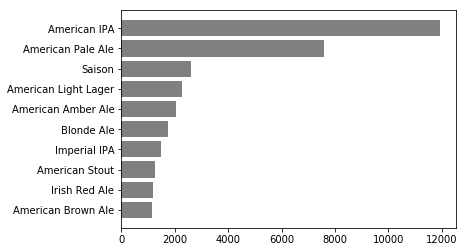

In [14]:
# 上位10 Styleグラフ化
obj10 = obj.head(10).sort_values()

plt.figure(figsize=(6,4))
plt.barh(obj10.index, obj10, color='gray')

### 説明変数の確認

In [15]:
expl = beer_recipe[['FG','ABV','IBU','Color','Efficiency']]
expl.head(5)

,FG,ABV,IBU,Color,Efficiency
BeerID,,,,,
1,1.013,5.48,17.65,4.83,70.0
2,1.021,8.16,60.65,15.64,70.0
3,1.018,5.91,59.25,8.98,70.0
4,1.017,5.80,54.48,8.50,70.0
5,1.010,6.48,17.84,4.57,72.0


各項目の全体感の把握はCorrelation Matrixが最適

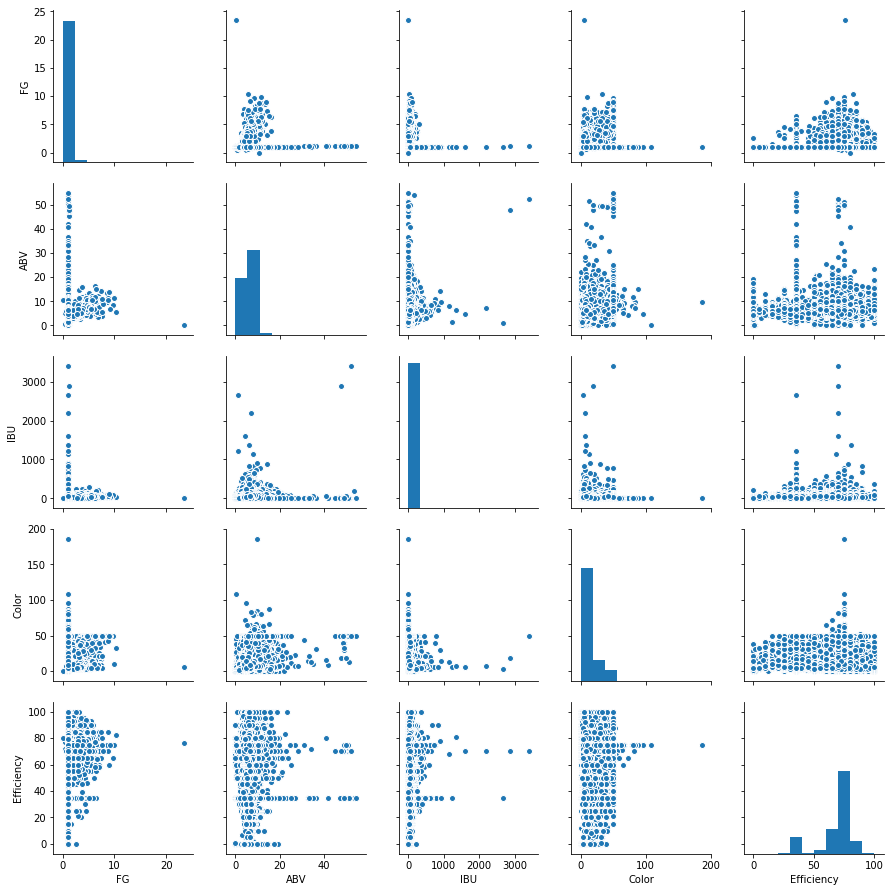

In [16]:
import seaborn as sns
sns.pairplot(expl)
plt.show()

どのカテゴリーもデータに偏りがある模様…